In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('water.txt', sep='\t')

In [5]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


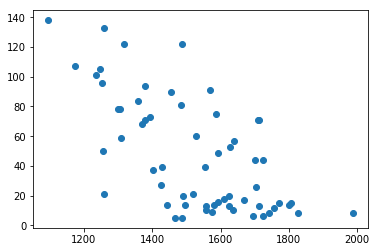

In [8]:
plt.plot(data.mortality, data.hardness, 'o')

In [9]:
data.corr() #1

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [10]:
data.corr(method='spearman') #2

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [13]:
south = data[data.location == "South"]
north = data[data.location == "North"]

In [14]:
south.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [15]:
north.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [16]:
a, b = np.abs(-0.602153), np.abs(-0.368598)

In [19]:
a < b
b #3

0.368598

In [32]:
columns = ['Man', 'Woman']
man = [239, 515]
woman = [203, 718]

df = pd.DataFrame(data={0:man, 1:woman})
a = 239
b = 203
c = 515
d = 718
obs = np.array(df)
df

,0,1
0,239,203
1,515,718


In [64]:
def Matthews_stat(confusion_matrix):
    a = confusion_matrix[0, 0]
    b = confusion_matrix[0, 1]
    c = confusion_matrix[1, 0]
    d = confusion_matrix[1, 1]
    return (a*d - b*c) / np.sqrt((a+b)*(a+c)*(b+d)*(c+d))

In [67]:
Matthews_stat(obs)

0.10900237458678963

In [29]:
from scipy import stats

In [33]:
stats.chi2_contingency(obs) #5

(19.40753078854304,
 1.0558987006638725e-05,
 1,
 array([[198.96597015, 243.03402985],
        [555.03402985, 677.96597015]]))

In [37]:
from statsmodels.stats.proportion import proportion_confint
import scipy

In [40]:
def proportions_diff_confint_ind(s1, n1, s2, n2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = s1 / n1
    p2 = s2 / n2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    return (left_boundary, right_boundary)

In [61]:
proportions_diff_confint_ind(239, 239+515, 203, 203+718) #6

(0.053905233215813156, 0.13922183141523897)

In [45]:
def proportions_diff_z_stat_ind(s1, n1, s2, n2):
    
    p1 = s1 / n1
    p2 = s2 / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [46]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [47]:
proportions_diff_z_test(proportions_diff_z_stat_ind(203, 203+718, 239, 239+515)) #7

8.153453089576601e-06

In [49]:
happy = pd.DataFrame(data={0:[197, 382, 110], 1:[111, 685, 342], 2:[33, 331, 333]})
happy

,0,1,2
0,197,111,33
1,382,685,331
2,110,342,333


In [55]:
stats.chi2_contingency(happy) #8, 9

(293.68311039689746,
 2.4964299580093467e-62,
 4,
 array([[ 93.08597464, 153.74722662,  94.16679873],
        [381.6251981 , 630.318542  , 386.0562599 ],
        [214.28882726, 353.93423138, 216.77694136]]))

In [62]:
def Cramers_stat(confusion_matrix):  
    chi2 = stats.chi2_contingency(confusion_matrix)[0]  
    n = confusion_matrix.sum().sum()  
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [63]:
Cramers_stat(happy) #10

0.2412013934500338